In [1]:
#import matplotlib.pyplot as plt
import math
from RSSmodel import *
import numpy as np
from matplotlib import pyplot as plt
import random
from main import *

In [ ]:
lis = []

### 测试

测试Env类所有公开方法。

In [ ]:
epoch_num = 0
m_num = 0
for each in range(100):
    env = RssEnv()
    s1,r1 = env.step(0)
    s2,r2 = env.step(1)
    s3,r3 = env.step(2)
    if(r2>r1 or r3>r1):
        m_num += 1
    #print('the epoch {} winner is {}'.format(epoch_num, np.argmax([r1,r2,r3])))
    #print('直接传输 状态{}，效用{}'.format(s1,r1))
    #print('中继1传输 状态{}，效用{}'.format(s2,r2))
    #print('中继2传输 状态{}，效用{}'.format(s3,r3))
    #epoch_num += 1
print('中继转发：{}'.format(m_num))

In [ ]:
y = [env._g_channel_gain(x) for x in np.arange(-1,1, 0.001) ]
plt.plot(np.arange(-1,1,0.001), y)

In [ ]:
def fun1(x, y):
    g1 = g_channel_gain(x)
    g2 = g_channel_gain(y)
    return 0.1*0.06*g1*g2 / (0.1*(0.1*g1 + 0.06*g2 )+ 0.01)

In [ ]:
def g_channel_gain(x):
        mu = 0
        sigma2 = 0.16
        y = 1.0/np.sqrt(2*math.pi*sigma2) * np.exp(-(x-mu)**2 /(2*sigma2))
        #a = np.random.normal(mu, sigma2**0.5)
        return y

In [ ]:
x =  np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)
x,y = np.meshgrid(x,y)
#z = 
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, fun1(x,y), rstride=1,cstride=1,cmap=plt.cm.spring)

In [ ]:
print(env.d_point)
ret = []
for _ in range(3000):
    env._d_move()
    ret.append(env.d_point)
plt.plot(range(3000), ret)

In [25]:
env = RssEnv()
agent = Agent(env)
lists = []

In [26]:
lists = []
for each in range(1):
    agent.learning(gamma=0.9, \
                alpha=0.1, \
                max_episode_num=6)
    #agent.env._d_move()
    lists.extend(agent.sum_utility_list)

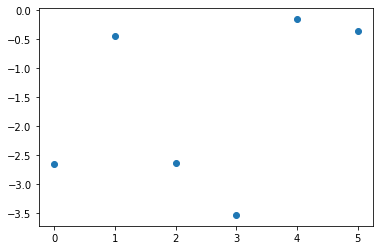

In [27]:
plt.scatter(range(len(lists)), lists)
#plt.plot(range(len(agent.sum_utility_list)), agent.sum_utility_list)

In [7]:
def fun1():
    point = [(0.1,0.1),(0.2,0.2),(0.3,0.3)]
    i = 0
    while True:
            d_point = point[i if i<3 else 0]
            i = i+1 if i<3 else 0
            yield d_point

In [7]:
g = fun1()

In [35]:
next(g)

(0.3, 0.3)

{0: 0.0719540894729063, 1: -0.4683830161446694, 2: 0.09624451411591207}
{0: 0.0719540894729063, 1: -0.4683830161446694, 2: 0.09624451411591207}
{0: 0.02003871896227851, 1: -0.5103188890031702, 2: -0.47512366474129025}
105


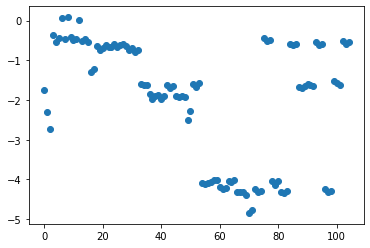

In [38]:
lis = []
for each1 in agent.Q.values():
    for each2 in each1.values():
        if(each2>0):
            print(each1)
        lis.append(each2)
lis = np.array(lis)

#print(len([0 for each in (lis > 0) if each==True]))
print(len(lis))
plt.scatter(range(len(lis)),lis)